# WAV
https://docs.python.org/3/library/wave.html
https://en.wikipedia.org/wiki/WAV

* Linear Pulse Code Modulated
* Uncompressed
* RIFF Resource Interchange File Format


In [41]:
import wave

### rb = read only mode, wb = write only mode

In [75]:
file_path = '/Users/nicolasromano/Documents/code/AlgoRhythms/Digital_Audio/sound_files/test1.wav'
wave_data = wave.open(file_path, 'rb')
framerate = wave_data.getframerate()
print('Frame Rate:', framerate, 'Hz')
total_frames = wave_data.getnframes()
print('Total Frames', total_frames)
sample_width = wave_data.getsampwidth()
print('Sample Width', sample_width)
channels = wave_data.getnchannels()
print('Channel Count', channels)
print(wave_data.getparams())
wave_data.close()

Frame Rate: 32000 Hz
Total Frames 320303
Sample Width 2
Channel Count 2
_wave_params(nchannels=2, sampwidth=2, framerate=32000, nframes=320303, comptype='NONE', compname='not compressed')


In [77]:
song_length = total_frames / framerate
print('audio file duration (s)', song_length)

audio file duration (s) 10.00946875


In [50]:
wave_data = wave.open(file_path, 'rb')
data = wave_data.readframes(total_frames)
wave_data.close()

In [51]:
from pydub import AudioSegment

sound = AudioSegment(
    # raw audio data (bytes)
    data = data,

    # 2 byte (16 bit) samples
    sample_width = sample_width,

    # 44.1 kHz frame rate
    frame_rate = framerate,

    # stereo
    channels = channels
)

In [87]:
import numpy as np
b_array = bytearray(data)

for i in range(0, 11):
    b_array[i * framerate] = 255


mod_d = bytes(b_array)

In [92]:
from pydub import AudioSegment

sound = AudioSegment(
    # raw audio data (bytes)
    data = data,

    # 2 byte (16 bit) samples
    sample_width = sample_width,

    # 44.1 kHz frame rate
    frame_rate = framerate,

    # stereo
    channels = channels
)

sound.export('new.wav', format = 'wav')

<_io.BufferedRandom name='new'>

C:\Users\nicor\AppData\Local\Temp\ipykernel_38344\1721305502.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, np.int16)


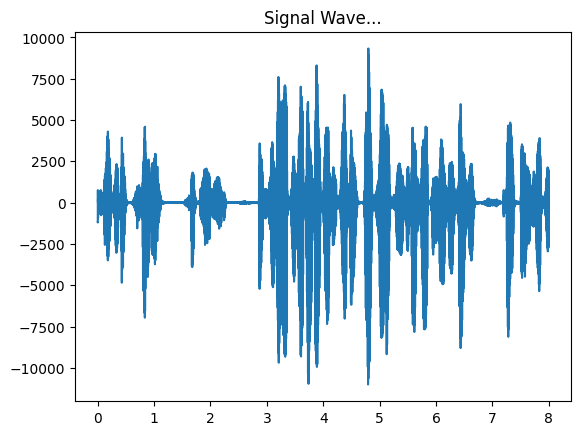

In [19]:

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open("sound_files/test4.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, np.int16)
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()